## *Fetch Stock Data (using yfinance as proxy for "Additional Finance Data")*

# Import

In [2]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Let's pick a stock found in your news data, e.g., AAPL

In [5]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-30"
stock_data = yf.download(ticker, start=start_date, end=end_date)

C:\Users\mulat\AppData\Local\Temp\ipykernel_17108\1731058079.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


# Check if MultiIndex (common in new yfinance) and flatten if needed

In [6]:
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)

print(stock_data.head())

Price           Close       High        Low       Open     Volume
Date                                                             
2020-01-02  72.468254  72.528574  71.223252  71.476592  135480400
2020-01-03  71.763718  72.523746  71.539330  71.696160  146322800
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200
2020-01-07  71.995361  72.600968  71.775796  72.345212  108872000
2020-01-08  73.153496  73.455095  71.698581  71.698581  132079200


## *Apply Indicators (TA-Lib)*

# Simple Moving Average (SMA)

In [7]:
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# RSI

In [8]:
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

# MACD

In [9]:
stock_data['MACD'], stock_data['MACD_signal'], stock_data['MACD_hist'] = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

## *Visualize*

# Plot Price and SMA

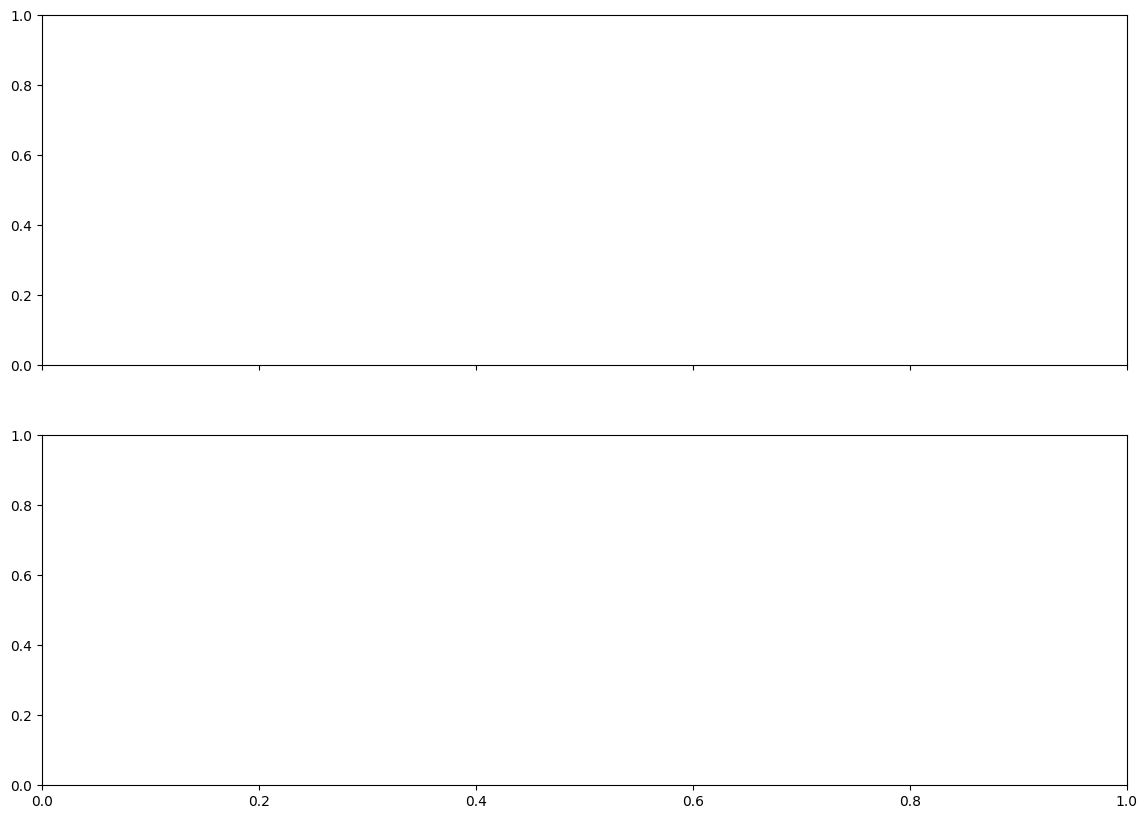

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

In [12]:
ax1.plot(stock_data.index, stock_data['Close'], label='Close Price')
ax1.plot(stock_data.index, stock_data['SMA_20'], label='20-Day SMA', color='orange')
ax1.legend()
ax1.set_title(f'{ticker} Price & SMA')

Text(0.5, 1.0, 'AAPL Price & SMA')

# Plot RSI

In [14]:
ax2.plot(stock_data.index, stock_data['RSI'], label='RSI', color='purple')
ax2.axhline(70, linestyle='--', alpha=0.5, color='red')
ax2.axhline(30, linestyle='--', alpha=0.5, color='green')
ax2.set_title('Relative Strength Index (RSI)')

plt.show()